In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Pharma_Industry.csv')

In [3]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

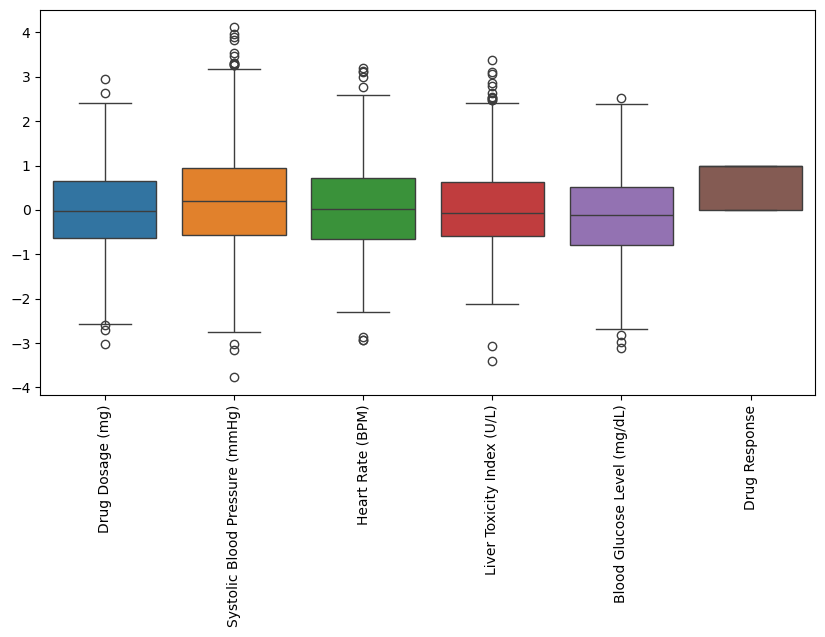

In [6]:
### outlier detection
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

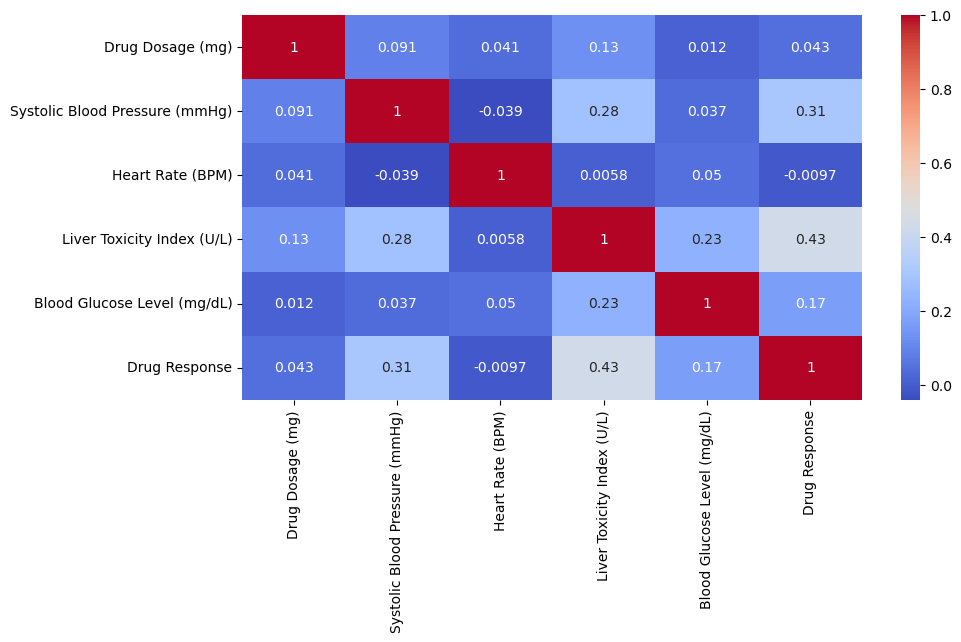

In [7]:
### correlation analysis
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Some biomarkers show strong correlation with drug response
Scaling is required due to different feature ranges

### 2 DATA PREPROCESSING

In [8]:
###TRAIN-TEST SPLIT

In [10]:
from sklearn.model_selection import train_test_split

x = df.drop('Drug Response',axis=1)
y = df['Drug Response']

x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42,stratify=y
)

### 3 Data Visualization

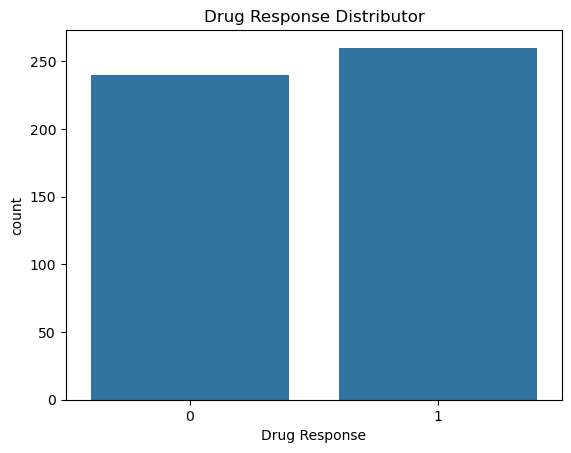

In [11]:
### class distribution

sns.countplot(x=y)
plt.title('Drug Response Distributor')
plt.show()


### 4 SVM implementation

In [17]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [18]:
### Train SVM Classifier
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',random_state=42)
svm_model.fit(x_train_scaled,y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [19]:
### model evaluation
from sklearn.metrics import classification_report, accuracy_score

y_pred = svm_model.predict(x_test_scaled)

print('ACCURACY:',accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

ACCURACY: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



### 5: Visualization of SVM Results

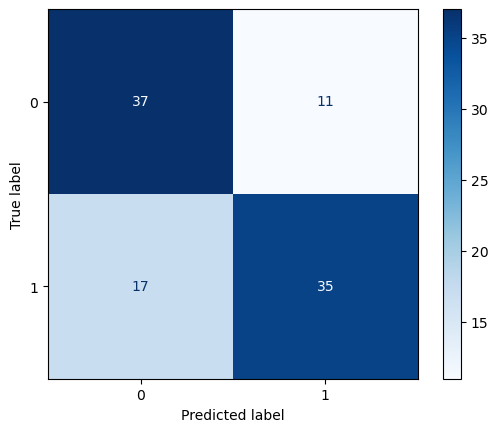

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    svm_model,x_test_scaled,y_test,cmap='Blues'
)
plt.show()

True Positives → Correctly predicted responders

False Negatives → Dangerous (missed effective drug)

In [23]:
###Trying Different Kernels
kernels = ['linear', 'rbf', 'poly']
for k in kernels:
    model = SVC(kernel=k)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    print(f"{k} kernel accuracy:", accuracy_score(y_test, y_pred))

linear kernel accuracy: 0.72
rbf kernel accuracy: 0.77
poly kernel accuracy: 0.65


In [24]:
### grid search optimizer
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C':[0.1,1,10],
    'kernel':['linear','rbf'],
    'gamma':['scale','auto']
}

grid = GridSearchCV(SVC(),param_grid,cv=5)
grid.fit(x_train_scaled,y_train)

grid.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

### 7 Comparison and analysis